In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Input,Dense, LSTM, GRU, Dropout

In [54]:
tr_df = pd.read_csv('DailyData.csv')

In [55]:
tr_df.head()

,campaign name,date,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
0,SHOPTIMISED PMax-46 - all products-M,2023-11-28,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.000000,0.000000,0.000000,0.00,0.000000
1,SHOPTIMISED PMax-46 - all products-M,2023-11-29,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.000000,4060000.000,0.965759,0.369091,4.060000,4.06,0.246305
2,SHOPTIMISED PMax-46 - all products-M,2023-11-30,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,1.068702,0.204286,4.085714,1.43,0.000000
3,SHOPTIMISED PMax-46 - all products-M,2023-12-01,5,684,2640000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.730994,0.528000,10.560000,2.64,0.000000
4,SHOPTIMISED PMax-46 - all products-M,2023-12-02,43,3792,10510000,MAXIMIZE_CONVERSION_VALUE,3.332276,3154000.449,1.133966,0.244419,3.154000,10.51,0.317058


In [56]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   campaign name                 176 non-null    object 
 1   date                          176 non-null    object 
 2   clicks                        176 non-null    int64  
 3   impressions                   176 non-null    int64  
 4   cost_micros                   176 non-null    int64  
 5   bidding_strategy_type         176 non-null    object 
 6   conversions                   176 non-null    float64
 7   cost_per_conversion           170 non-null    float64
 8   Click-through rate (CTR)      176 non-null    float64
 9   average cost per click (CPC)  176 non-null    float64
 10  cost-per-acquisition (CPA)    176 non-null    float64
 11  Cost                          176 non-null    float64
 12  conversion per euro           176 non-null    float64
dtypes: fl

In [57]:
tr_df['date'] = pd.to_datetime(tr_df['date'])

In [58]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   campaign name                 176 non-null    object        
 1   date                          176 non-null    datetime64[ns]
 2   clicks                        176 non-null    int64         
 3   impressions                   176 non-null    int64         
 4   cost_micros                   176 non-null    int64         
 5   bidding_strategy_type         176 non-null    object        
 6   conversions                   176 non-null    float64       
 7   cost_per_conversion           170 non-null    float64       
 8   Click-through rate (CTR)      176 non-null    float64       
 9   average cost per click (CPC)  176 non-null    float64       
 10  cost-per-acquisition (CPA)    176 non-null    float64       
 11  Cost                          17

In [59]:
tr_df.set_index('date', inplace= True)

In [60]:
tr_df.head()

,campaign name,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
date,,,,,,,,,,,,
2023-11-28,SHOPTIMISED PMax-46 - all products-M,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.000000,0.000000,0.000000,0.00,0.000000
2023-11-29,SHOPTIMISED PMax-46 - all products-M,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.000000,4060000.000,0.965759,0.369091,4.060000,4.06,0.246305
2023-11-30,SHOPTIMISED PMax-46 - all products-M,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,1.068702,0.204286,4.085714,1.43,0.000000
2023-12-01,SHOPTIMISED PMax-46 - all products-M,5,684,2640000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.730994,0.528000,10.560000,2.64,0.000000
2023-12-02,SHOPTIMISED PMax-46 - all products-M,43,3792,10510000,MAXIMIZE_CONVERSION_VALUE,3.332276,3154000.449,1.133966,0.244419,3.154000,10.51,0.317058


# Cost Trend

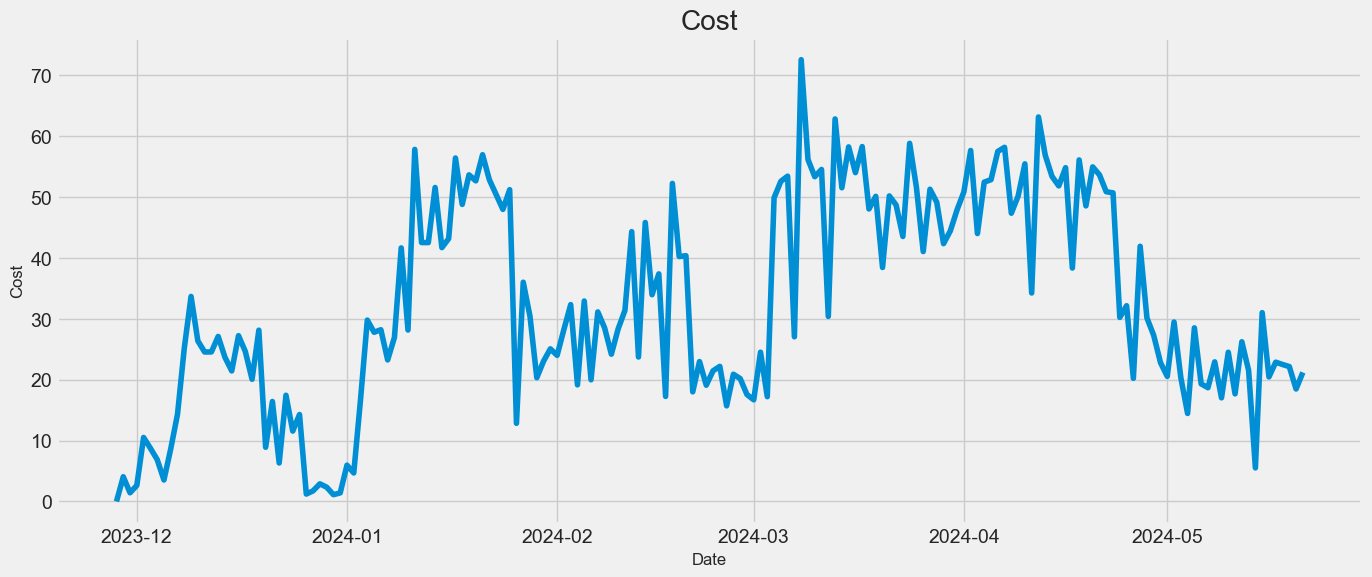

In [61]:
plt.figure(figsize = (15, 6))
plt.plot(tr_df.index, tr_df['Cost'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Cost', {'fontsize': 12})
plt.title('Cost')
plt.show()

In [62]:
n_cols = 1
Costdataset = tr_df['Cost']
Costdataset = pd.DataFrame(Costdataset)
Costdata = Costdataset.values

Costdata.shape

(176, 1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
Cost_scaled_data = scaler.fit_transform(np.array(Costdata))

In [64]:
train_size = int(len(Costdata) * 0.80)
test_size = len(Costdata) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 140 Test Size : 36


In [65]:
train_data = Cost_scaled_data[0:train_size, :]
train_data.shape

(140, 1)

In [66]:
# Creating a Training set with 60 time-steps and 1 target
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.        ],
       [0.05597552],
       [0.01971552],
       [0.03639788],
       [0.14490215],
       [0.1206369 ],
       [0.09499294],
       [0.04866837],
       [0.11898245],
       [0.19733525],
       [0.3469019 ],
       [0.46415043],
       [0.36356389],
       [0.33840294],
       [0.33847267],
       [0.37354962],
       [0.32639358],
       [0.29555243],
       [0.37532416],
       [0.33971351],
       [0.27656871],
       [0.38772596],
       [0.12270496],
       [0.22638376],
       [0.08713431],
       [0.24049173],
       [0.15937858],
       [0.19687942],
       [0.01682023],
       [0.02412738],
       [0.03998252],
       [0.03239962],
       [0.01544152],
       [0.01943977],
       [0.08230883],
       [0.06452351],
       [0.23093349],
       [0.41057907],
       [0.38300492],
       [0.38879549],
       [0.3204116 ],
       [0.37128591],
       [0.5739559 ],
       [0.38810614],
       [0.79689289],
       [0.58608853],
       [0.58595065],
  

In [67]:
len(x_train)

80

In [68]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [69]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [70]:
x_train.shape , y_train.shape

((80, 60, 1), (80, 1))

In [73]:
model = Sequential([
    Input(shape=(time_steps, n_cols)),
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics=['mean_absolute_error'])

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 300, batch_size= 16 , callbacks= callbacks )

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2199 - mean_absolute_error: 0.4050
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0563 - mean_absolute_error: 0.2046
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0363 - mean_absolute_error: 0.1503
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0450 - mean_absolute_error: 0.1656
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0313 - mean_absolute_error: 0.1412
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0318 - mean_absolute_error: 0.1490
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0292 - mean_absolute_error: 0.1380
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.1434
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.1302
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.1295
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

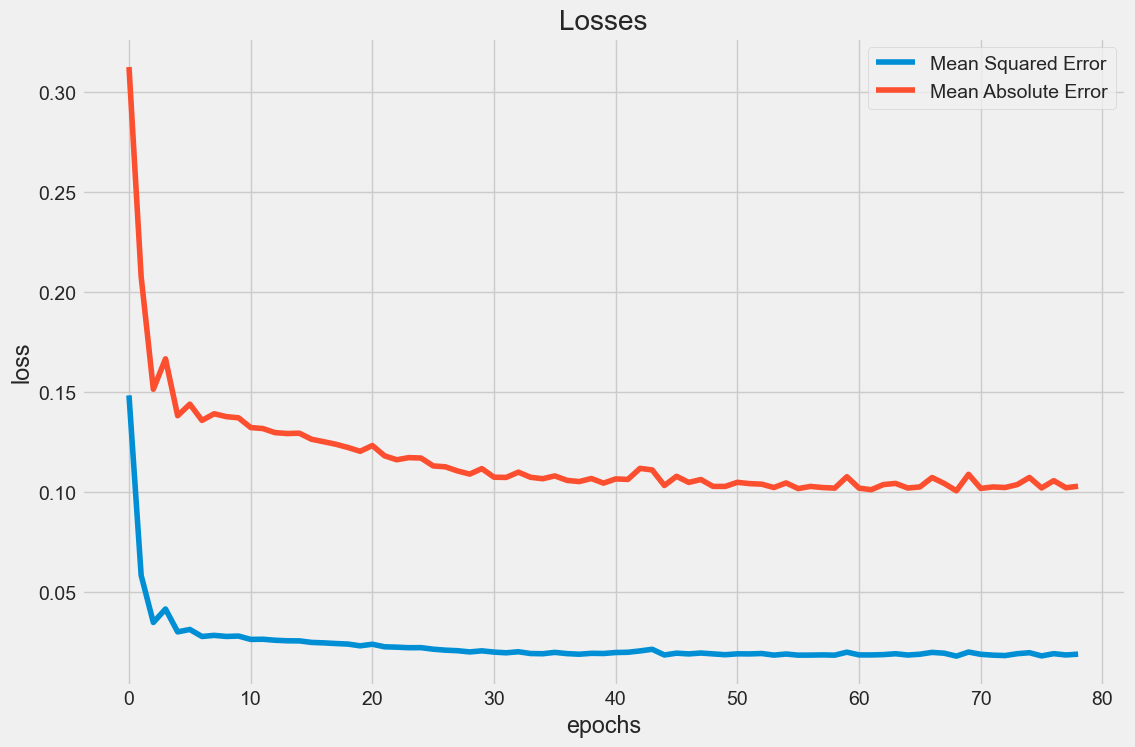

In [78]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [79]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = Cost_scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [80]:
x_test.shape , y_test.shape

((36, 60, 1), (36, 1))

In [81]:
predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


In [82]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(36, 1)

In [83]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

3.4

In [84]:
preds_acts = pd.DataFrame(data={'Predicted Cost':predictions.flatten(), 'Actual Cost':y_test.flatten()})
preds_acts

,Predicted Cost,Actual Cost
0,49.627026,54.800000
1,50.199547,38.325701
2,47.517883,56.074287
3,47.286369,48.527914
4,46.771175,54.936154
5,47.533337,53.621576
6,48.537224,50.848553
7,48.964134,50.670000
8,49.013134,30.221460
9,44.888462,32.140000


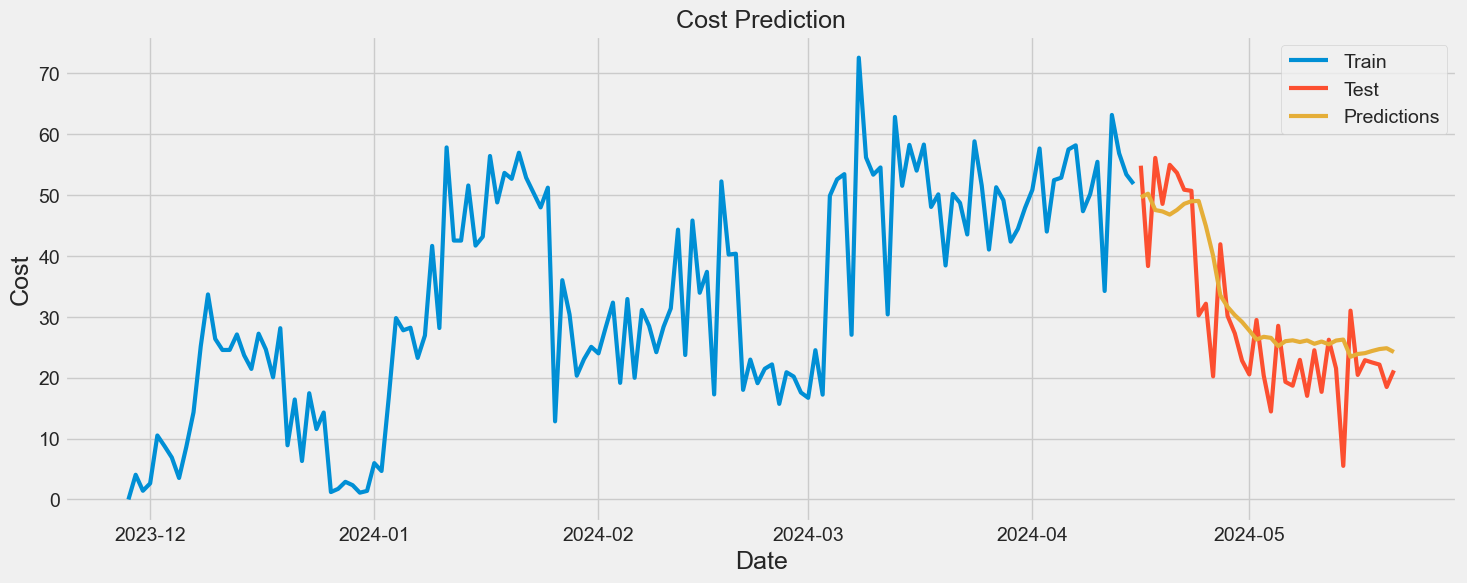

In [85]:
train = Costdataset.iloc[:train_size , 0:1]
test =Costdataset.iloc[train_size: , 0:1]
test['Predicted Cost'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Cost Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Cost', fontsize= 18)
plt.plot(train['Cost'], linewidth= 3)
plt.plot(test['Cost'], linewidth= 3)
plt.plot(test["Predicted Cost"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

## Forecast Next 30 Days

In [86]:
from datetime import timedelta

In [87]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [88]:
future = 15*2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(Costdataset.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.33386883]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.33386883, 0.33483455]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.33386883, 0.33483455, 0.34005174]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754, 0.36247548]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754, 0.36247548, 0.36972398]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754, 0.36247548, 0.36972398, 0.37634328]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754, 0.36247548, 0.36972398, 0.37634328, 0.38220716]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.33386883, 0.33483455, 0.34005174, 0.34712282, 0.35481754, 0.36247548

In [89]:
time

[Timestamp('2024-05-21 00:00:00'),
 Timestamp('2024-05-22 00:00:00'),
 Timestamp('2024-05-23 00:00:00'),
 Timestamp('2024-05-24 00:00:00'),
 Timestamp('2024-05-25 00:00:00'),
 Timestamp('2024-05-26 00:00:00'),
 Timestamp('2024-05-27 00:00:00'),
 Timestamp('2024-05-28 00:00:00'),
 Timestamp('2024-05-29 00:00:00'),
 Timestamp('2024-05-30 00:00:00'),
 Timestamp('2024-05-31 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-06-02 00:00:00'),
 Timestamp('2024-06-03 00:00:00'),
 Timestamp('2024-06-04 00:00:00'),
 Timestamp('2024-06-05 00:00:00'),
 Timestamp('2024-06-06 00:00:00'),
 Timestamp('2024-06-07 00:00:00'),
 Timestamp('2024-06-08 00:00:00'),
 Timestamp('2024-06-09 00:00:00'),
 Timestamp('2024-06-10 00:00:00'),
 Timestamp('2024-06-11 00:00:00'),
 Timestamp('2024-06-12 00:00:00'),
 Timestamp('2024-06-13 00:00:00'),
 Timestamp('2024-06-14 00:00:00'),
 Timestamp('2024-06-15 00:00:00'),
 Timestamp('2024-06-16 00:00:00'),
 Timestamp('2024-06-17 00:00:00'),
 Timestamp('2024-06-

In [90]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [91]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

In [92]:
df_result

,Date,Forecasted
0,2024-05-21,24.216076
1,2024-05-22,24.286121
2,2024-05-23,24.664532
3,2024-05-24,25.177410
4,2024-05-25,25.735521
5,2024-05-26,26.290964
6,2024-05-27,26.816710
7,2024-05-28,27.296820
8,2024-05-29,27.722137
9,2024-05-30,28.088154


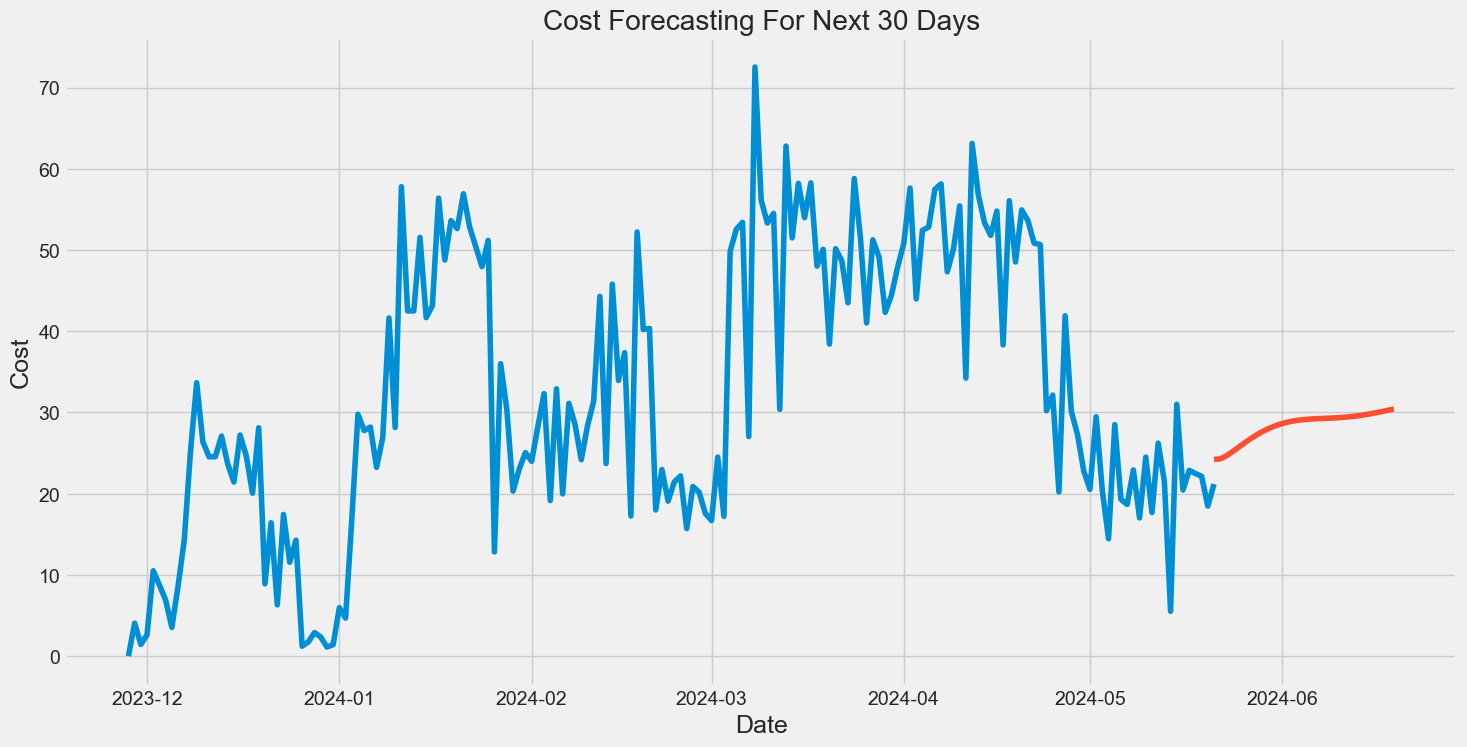

In [93]:
plt.figure(figsize=(16,8))
plt.title('Cost Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cost' ,fontsize=18)
plt.plot(Costdataset['Cost'])
plt.plot(df_result.set_index('Date')[['Forecasted']])